In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
import os
    

Welcome to JupyROOT 6.26/04


# FBDT train_v0

In [2]:
trainVars_etapip_gg = [
    #'Dp_acos_cosAngleBetweenMomentumAndVertexVector',
    'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
    'etapip_Eta_daughterDiffOfPhi_0_1',
    'etapip_Eta_daughterAngle_0_1',
    'Dp_CMS_p',
    'etapip_Eta_p',
    'Dp_isSignal',
    'Dp_M',
]
trainVars_etaKp_gg = [
    #'Dp_cosAngleBetweenMomentumAndVertexVector',
    'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
    'etapip_Eta_daughterDiffOfPhi_0_1',
    'etapip_Eta_daughterAngle_0_1',
    'Dp_CMS_p',
    'etapip_Eta_p',
    'Dp_isSignal',
    'Dp_M',
]
trainVars_etapip_pipipi = [
    #'Dp_cosAngleBetweenMomentumAndVertexVector',
    'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
    'eta_Pi0_daughterDiffOfPhi_0_1',
    'eta_Pi0_daughterAngle_0_1',
    'Dp_CMS_p',
    'etapip_Eta_p',
    'Dp_isSignal',
    'Dp_M',
]
trainVars_etapip_pipipi_K = [
    #'Dp_cosAngleBetweenMomentumAndVertexVector',
    'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
    'eta_Pi0_daughterDiffOfPhi_0_1',
    'eta_Pi0_daughterAngle_0_1',
    'Dp_CMS_p',
    'etapip_Eta_p',
    'Dp_isSignal',
    'Dp_M',
]

In [3]:
file_dir = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_loose_v0_240505_etapi0const_onlybkg'
etapip_gg_train_data = file_dir + '/ML_etapip_gg_train.root'
etapip_gg_K_train_data = file_dir + '/ML_etapip_gg_K_train.root'
etapip_pipipi_train_data = file_dir + '/ML_etapip_pipipi_train.root'
etapip_pipipi_K_train_data = file_dir + '/ML_etapip_pipipi_K_train.root'


In [4]:
bkg_filter = 'Dp_isSignal!=1'
signal_filter    = 'Dp_isSignal==1'

tree = 'etapip_gg'

In [5]:
etapip_gg_bkg = get_pd(file=etapip_gg_train_data , tree=tree, variables=trainVars_etapip_gg ,base_filter=bkg_filter)
etapip_gg_sig = get_pd(file=etapip_gg_train_data , tree=tree, variables=trainVars_etapip_gg ,base_filter=signal_filter)

In [6]:
etapip_gg_bkg.describe()

,Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1,Dp_CMS_p,etapip_Eta_p,Dp_isSignal,Dp_M
count,223101.000000,223104.000000,223104.000000,223104.000000,223104.000000,149552.0,223104.000000
mean,1.426289,-0.006332,1.219783,2.950965,1.715644,0.0,1.886284
std,1.522726,1.576272,0.647214,0.397668,1.238625,0.0,0.084801
min,0.000000,-3.141580,0.188394,2.500003,0.400001,0.0,1.760000
25%,0.006046,-1.148522,0.616570,2.644619,0.587136,0.0,1.810013
50%,0.108371,-0.022799,1.164790,2.840930,1.196598,0.0,1.877457
75%,3.129637,1.130765,1.767580,3.150148,2.766946,0.0,1.957572
max,3.141593,3.141588,3.130770,8.998379,11.187429,0.0,2.049999


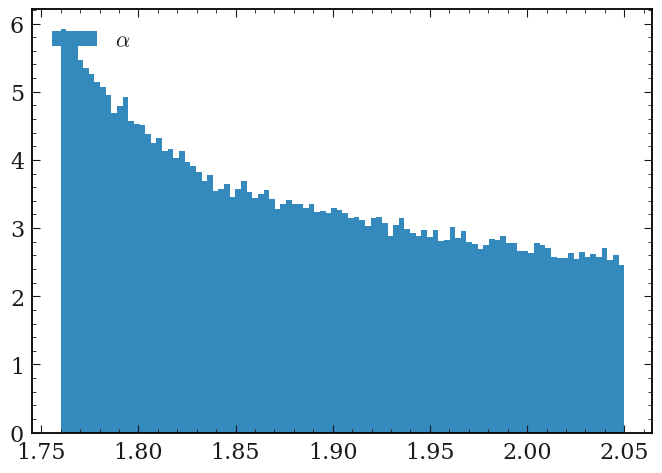

In [7]:
plt.hist(etapip_gg_bkg.Dp_M,bins=100,label=r'$\alpha$',density=True);
plt.legend(loc="upper left")

In [8]:
etapip_gg_sig.describe()

,Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1,Dp_CMS_p,etapip_Eta_p,Dp_isSignal,Dp_M
count,223357.000000,223358.000000,223358.000000,223358.000000,223358.000000,223358.0,223358.000000
mean,0.224724,-0.012427,0.717933,3.390322,2.240101,1.0,1.866440
std,0.776667,0.883541,0.403616,0.571500,1.015497,0.0,0.016385
min,0.000000,-3.141449,0.177428,2.500009,0.400110,1.0,1.760045
25%,0.000970,-0.518006,0.431515,2.911250,1.458384,1.0,1.859097
50%,0.003403,-0.021892,0.594106,3.326071,2.193774,1.0,1.867653
75%,0.011965,0.495198,0.880546,3.812543,2.927847,1.0,1.875441
max,3.141593,3.141573,3.119604,5.093513,6.329369,1.0,2.049868


## Draw plots


### train_v0

In [9]:
# type(xrange)
import math

In [10]:
def draw_bdt_var(bkg_data,sig_data,var,xrange, xlabel, xfontsize=None,save_dir=None):
    bkg_pd = bkg_data
    sig_pd = sig_data
    # xrange = (0,math.pi,51)
    xm = np.linspace(*xrange)
    # var = 'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane'
    
    plt.hist(bkg_pd[var], label='background',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
    plt.hist(sig_pd[var], label='signal',bins=xm,  histtype='step', density=True, hatch="//")
    
    ax = plt.gca()
    ax.set_xlim(xrange[0],xrange[1])   
    # xlabel = 'AngleBetweenMomentumAndVertexVectorInXYPlane($D^+$)'
    # plot_title = r'A variable of $\pi^0$ veto'
    if xfontsize==None:
        ax.set_xlabel(xlabel)
    else:    
        ax.set_xlabel(xlabel, fontsize=xfontsize)
    # plt.title(plot_title)
    #plt.axvline(x=1.0395,  color='red', linestyle='dotted')
    #plt.axvline(x=0.9995,  color='red', linestyle='dotted')
    plt.legend(loc='upper right')
    plt.tight_layout()
    if save_dir!=None:
        save_file = save_dir + '/' + var + '.png'
        plt.savefig(save_file)

### etapip_gg

In [11]:
trainVars_etapip_gg

['Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'etapip_Eta_daughterDiffOfPhi_0_1',
 'etapip_Eta_daughterAngle_0_1',
 'Dp_CMS_p',
 'etapip_Eta_p',
 'Dp_isSignal',
 'Dp_M']

In [12]:
save_dir = '/media/jykim/T7/saved_plots/Acp_mva/train_v0/etapip_gg'
# Check if the directory exists
if not os.path.exists(save_dir):
    # If it doesn't exist, create it
    os.makedirs(save_dir)
    print(f"Directory '{save_dir}' created successfully!")
else:
    print(f"Directory '{save_dir}' already exists.")

Directory '/media/jykim/T7/saved_plots/Acp_mva/train_v0/etapip_gg' already exists.


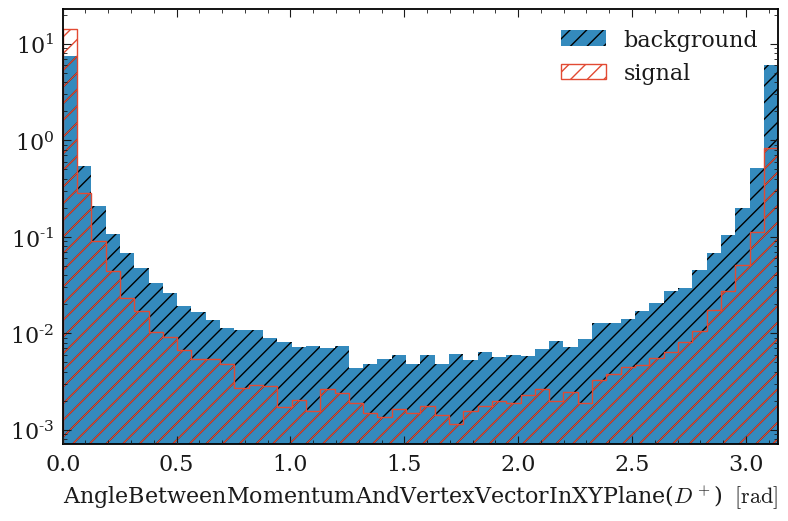

In [13]:
bkg_data = etapip_gg_bkg
sig_data = etapip_gg_sig

var='Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane'

draw_bdt_var(bkg_data,sig_data,\
             var=var, xrange = (0,math.pi,51),\
             xlabel = 'AngleBetweenMomentumAndVertexVectorInXYPlane($D^+$) $\; [\mathrm{rad}]$', xfontsize=16,save_dir=save_dir)

plt.yscale('log')

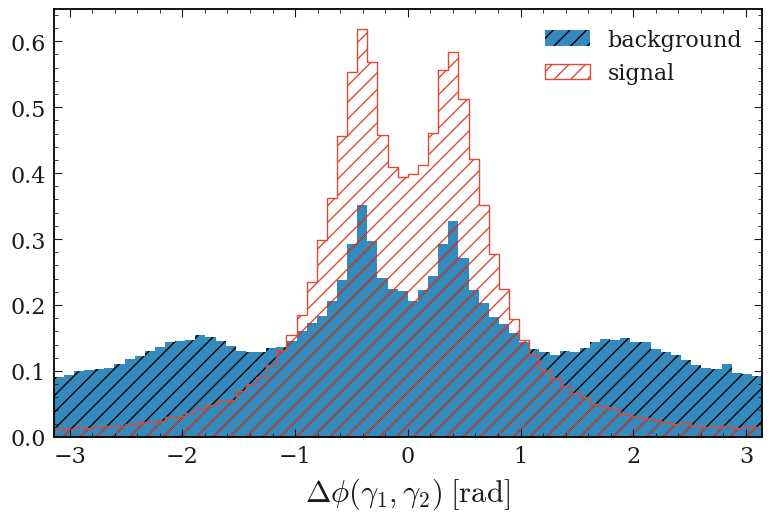

In [14]:
var='etapip_Eta_daughterDiffOfPhi_0_1'

draw_bdt_var(bkg_data,sig_data,\
             var=var, xrange = (-math.pi,math.pi,71),\
             xlabel = r'$\Delta\phi(\gamma_1,\gamma_2)\; [\mathrm{rad}]$',save_dir=save_dir)

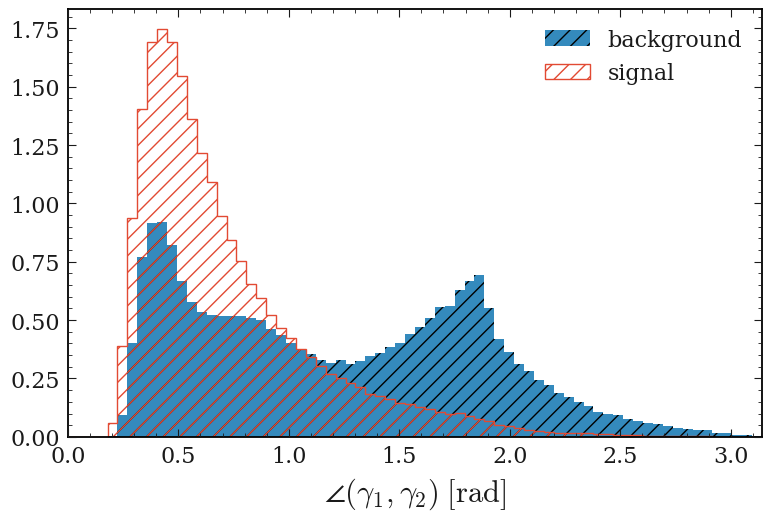

In [15]:
draw_bdt_var(bkg_data,sig_data,\
             var='etapip_Eta_daughterAngle_0_1', xrange = (0,math.pi,71),\
             xlabel = r'$\angle(\gamma_1,\gamma_2)\; [\mathrm{rad}]$',save_dir=save_dir)

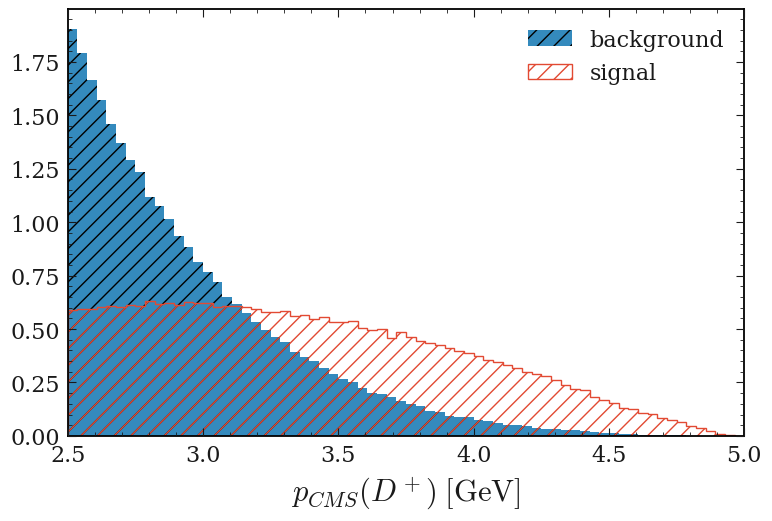

In [16]:


draw_bdt_var(bkg_data,sig_data,\
             var='Dp_CMS_p', xrange = (2.5,5,71),\
             xlabel = r'$p_{CMS}(D^+)\; [\mathrm{GeV}]$',save_dir=save_dir)

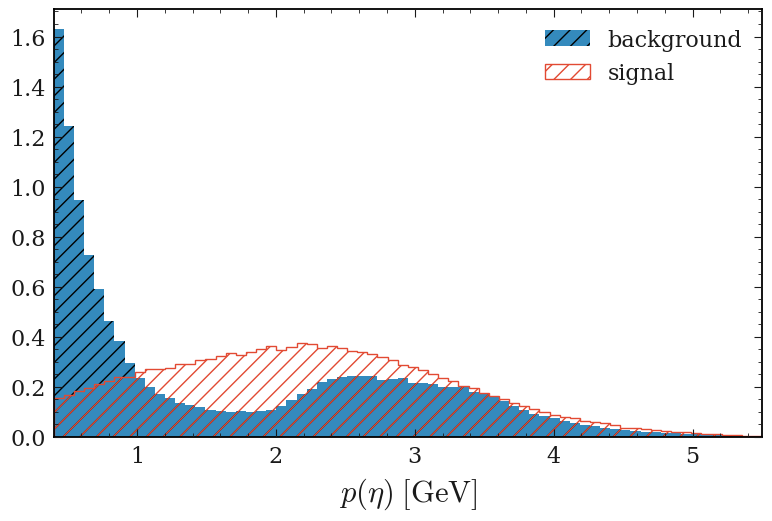

In [17]:
draw_bdt_var(bkg_data,sig_data,\
             var='etapip_Eta_p', xrange = (0.4,5.5,71),\
             xlabel = r'$p(\eta)\; [\mathrm{GeV}]$',save_dir=save_dir)

In [23]:
import seaborn as sb
# training_file = '/media/jykim/T7/storage/workspace/06_MVA/my_pi0etaveto/train_v2_new/pi0veto_train.root'
tree = 'etapip_gg'
df = get_pd(file=etapip_gg_train_data , tree=tree, variables=trainVars_etapip_gg ,base_filter='Dp_M>0')
df = df.drop("Dp_isSignal", axis=1)
# df = df.drop("Dp_M", axis=1)


<AxesSubplot:>

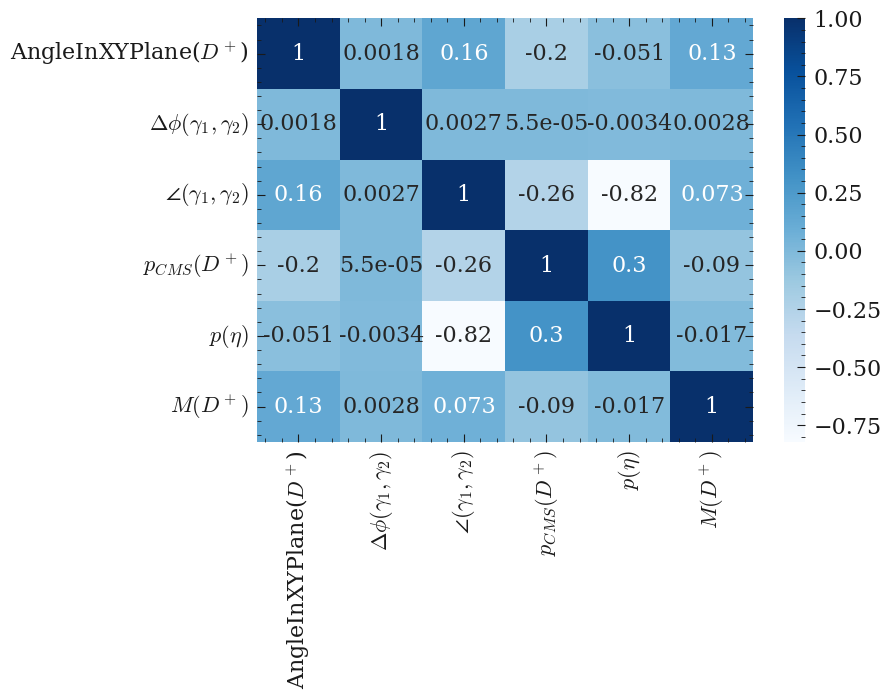

In [24]:
df.rename(columns = {'Dp_M':r'$M(D^+)$',\
                     'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane':'AngleInXYPlane($D^+$)',\
                     'etapip_Eta_daughterDiffOfPhi_0_1':r'$\Delta \phi(\gamma_1,\gamma_2)$',\
                     'etapip_Eta_daughterAngle_0_1':r'$ \angle (\gamma_1,\gamma_2)$',\
                     'Dp_CMS_p': '$p_{CMS}(D^+)$',\
                     'etapip_Eta_p':'$p(\eta)$'}, inplace = True)

corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:>

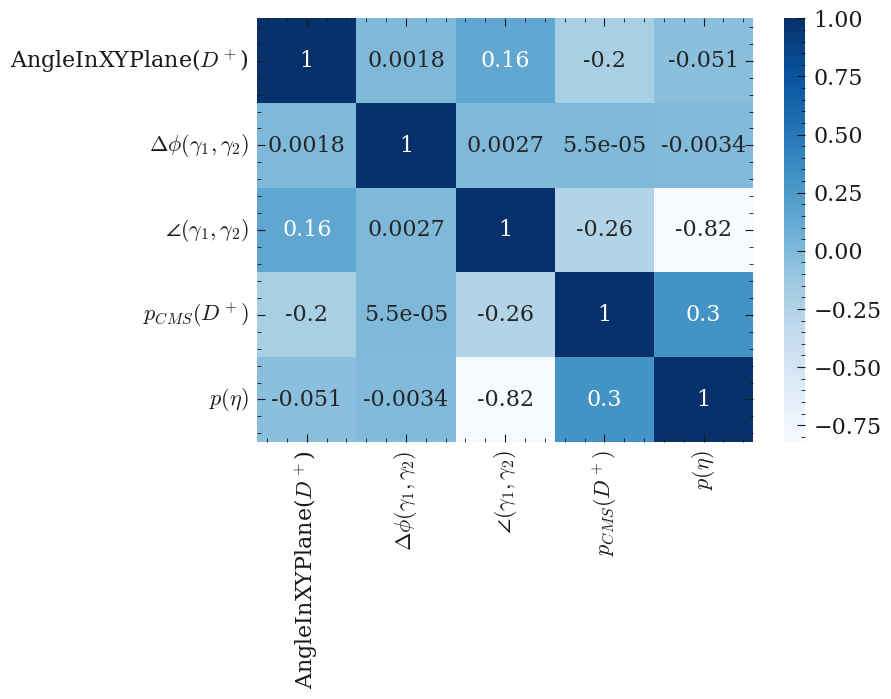

In [19]:
df.rename(columns = {'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane':'AngleInXYPlane($D^+$)',\
                     'etapip_Eta_daughterDiffOfPhi_0_1':r'$\Delta \phi(\gamma_1,\gamma_2)$',\
                     'etapip_Eta_daughterAngle_0_1':r'$ \angle (\gamma_1,\gamma_2)$',\
                     'Dp_CMS_p': '$p_{CMS}(D^+)$',\
                     'etapip_Eta_p':'$p(\eta)$'}, inplace = True)

corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

NameError: name 'y' is not defined

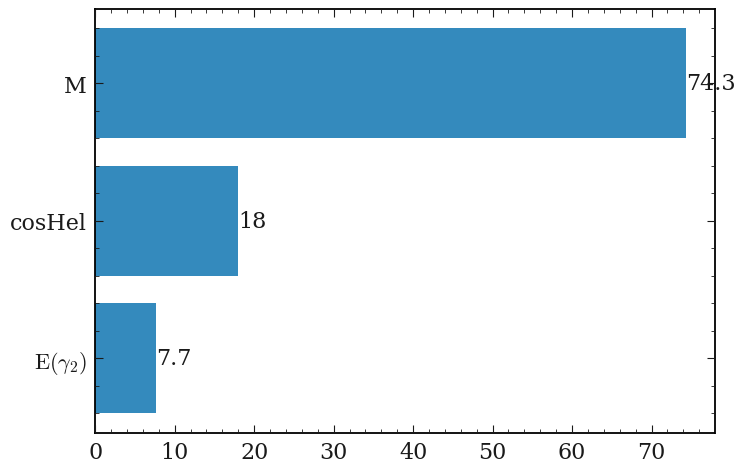

In [235]:
years = [r'$\mathrm{E}(\gamma_2)$', 'cosHel','M']
values = [7.7,18, 74.3]

fig, ax = plt.subplots()
bars = ax.barh(years, values)

ax.bar_label(bars)
plt.barh(y, values,color='gray')
plt.yticks(y, years)
plt.title('Feature Importance')
plt.show()

### etapip_gg_K

In [236]:
trainVars_etaKp_gg

['Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'etapip_Eta_daughterDiffOfPhi_0_1',
 'etapip_Eta_daughterAngle_0_1',
 'Dp_CMS_p',
 'etapip_Eta_p',
 'Dp_isSignal',
 'Dp_M']

In [237]:
save_dir = '/media/jykim/T7/saved_plots/Acp_mva/train_v0/etapip_gg_K'
# Check if the directory exists
if not os.path.exists(save_dir):
    # If it doesn't exist, create it
    os.makedirs(save_dir)
    print(f"Directory '{save_dir}' created successfully!")
else:
    print(f"Directory '{save_dir}' already exists.")

Directory '/media/jykim/T7/saved_plots/Acp_mva/train_v0/etapip_gg_K' already exists.


In [238]:
tree = 'etapip_gg_K'
etapip_gg_K_bkg = get_pd(file=etapip_gg_K_train_data , tree=tree, variables=trainVars_etaKp_gg ,base_filter=bkg_filter)
etapip_gg_K_sig = get_pd(file=etapip_gg_K_train_data , tree=tree, variables=trainVars_etaKp_gg ,base_filter=signal_filter)

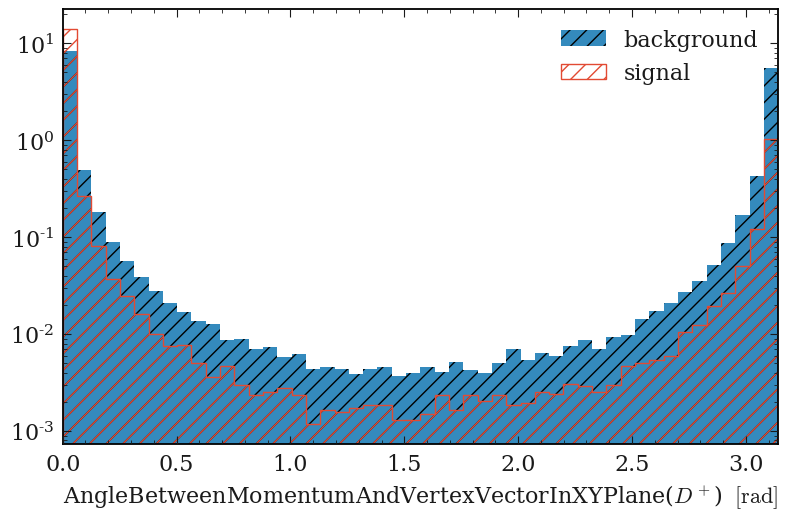

In [239]:
bkg_data = etapip_gg_K_bkg
sig_data = etapip_gg_K_sig

var='Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane'

draw_bdt_var(bkg_data,sig_data,\
             var=var, xrange = (0,math.pi,51),\
             xlabel = 'AngleBetweenMomentumAndVertexVectorInXYPlane($D^+$) $\; [\mathrm{rad}]$', xfontsize=16,save_dir=save_dir)
plt.yscale('log')

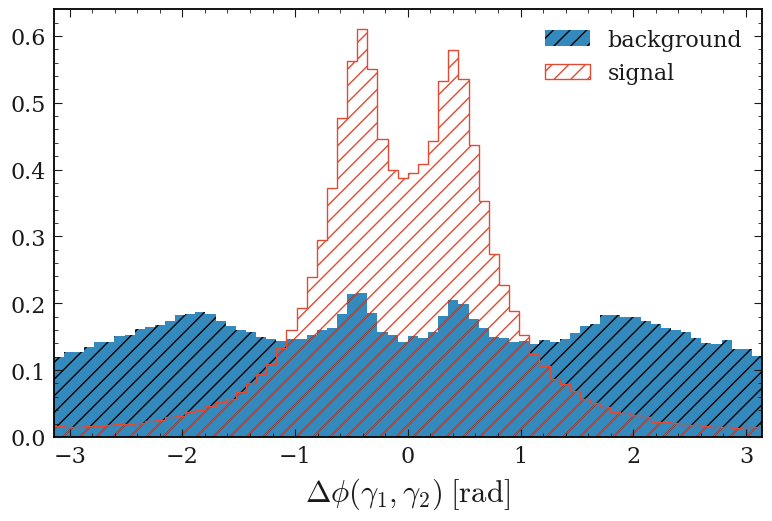

In [240]:
var='etapip_Eta_daughterDiffOfPhi_0_1'

draw_bdt_var(bkg_data,sig_data,\
             var=var, xrange = (-math.pi,math.pi,71),\
             xlabel = r'$\Delta\phi(\gamma_1,\gamma_2)\; [\mathrm{rad}]$',save_dir=save_dir)

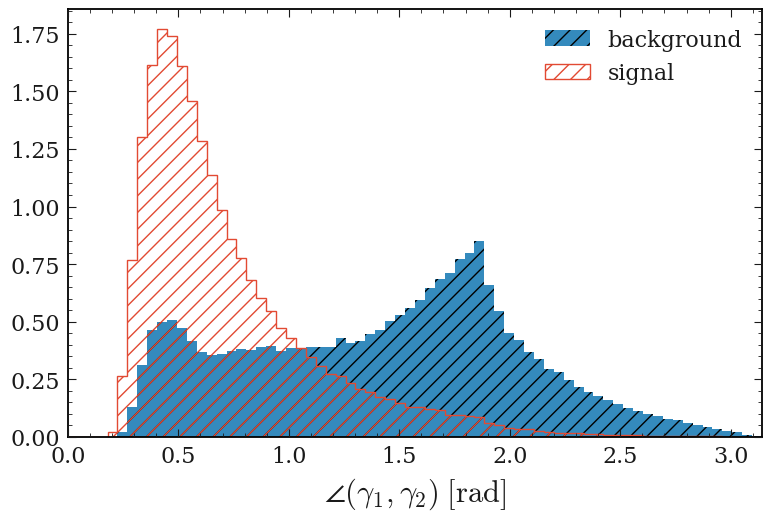

In [241]:
draw_bdt_var(bkg_data,sig_data,\
             var='etapip_Eta_daughterAngle_0_1', xrange = (0,math.pi,71),\
             xlabel = r'$\angle(\gamma_1,\gamma_2)\; [\mathrm{rad}]$',save_dir=save_dir)

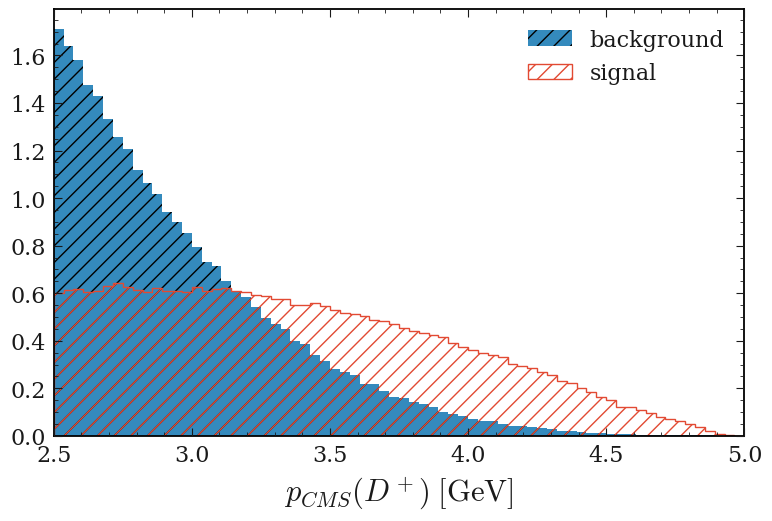

In [242]:


draw_bdt_var(bkg_data,sig_data,\
             var='Dp_CMS_p', xrange = (2.5,5,71),\
             xlabel = r'$p_{CMS}(D^+)\; [\mathrm{GeV}]$',save_dir=save_dir)

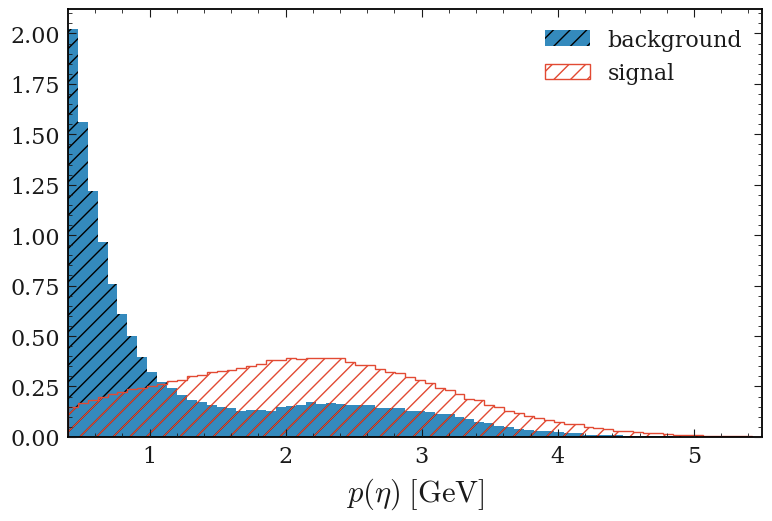

In [243]:
draw_bdt_var(bkg_data,sig_data,\
             var='etapip_Eta_p', xrange = (0.4,5.5,71),\
             xlabel = r'$p(\eta)\; [\mathrm{GeV}]$',save_dir=save_dir)

### etapip_pipipi

### etapip_pipipi_K

In [244]:
trainVars_etapip_pipipi_K

['Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'eta_Pi0_daughterDiffOfPhi_0_1',
 'eta_Pi0_daughterAngle_0_1',
 'Dp_CMS_p',
 'etapip_Eta_p',
 'Dp_isSignal',
 'Dp_M']

In [245]:
save_dir = '/media/jykim/T7/saved_plots/Acp_mva/train_v0/etapip_pipipi_K'
# Check if the directory exists
if not os.path.exists(save_dir):
    # If it doesn't exist, create it
    os.makedirs(save_dir)
    print(f"Directory '{save_dir}' created successfully!")
else:
    print(f"Directory '{save_dir}' already exists.")

Directory '/media/jykim/T7/saved_plots/Acp_mva/train_v0/etapip_pipipi_K' already exists.


In [246]:
tree = 'etapip_pipipi_K'
etapip_pipipi_bkg = get_pd(file=etapip_pipipi_K_train_data , tree=tree, variables=trainVars_etapip_pipipi ,base_filter=bkg_filter)
etapip_pipipi_sig = get_pd(file=etapip_pipipi_K_train_data , tree=tree, variables=trainVars_etapip_pipipi ,base_filter=signal_filter)

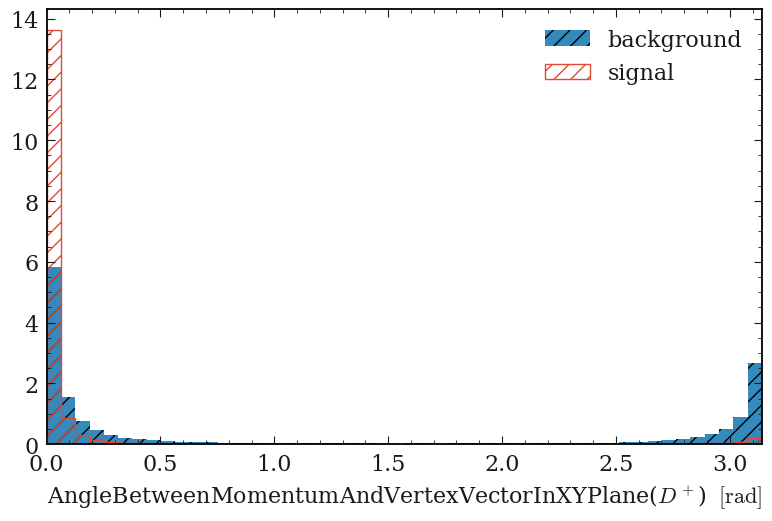

In [247]:
bkg_data = etapip_pipipi_bkg
sig_data = etapip_pipipi_sig

var='Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane'

draw_bdt_var(bkg_data,sig_data,\
             var=var, xrange = (0,math.pi,51),\
             xlabel = 'AngleBetweenMomentumAndVertexVectorInXYPlane($D^+$) $\; [\mathrm{rad}]$', xfontsize=16,save_dir=save_dir)

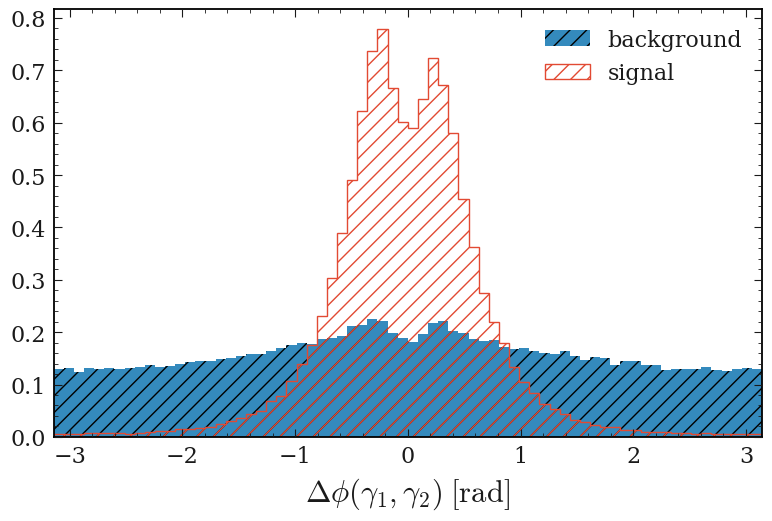

In [248]:
var='eta_Pi0_daughterDiffOfPhi_0_1'

draw_bdt_var(bkg_data,sig_data,\
             var=var, xrange = (-math.pi,math.pi,71),\
             xlabel = r'$\Delta\phi(\gamma_1,\gamma_2)\; [\mathrm{rad}]$',save_dir=save_dir)

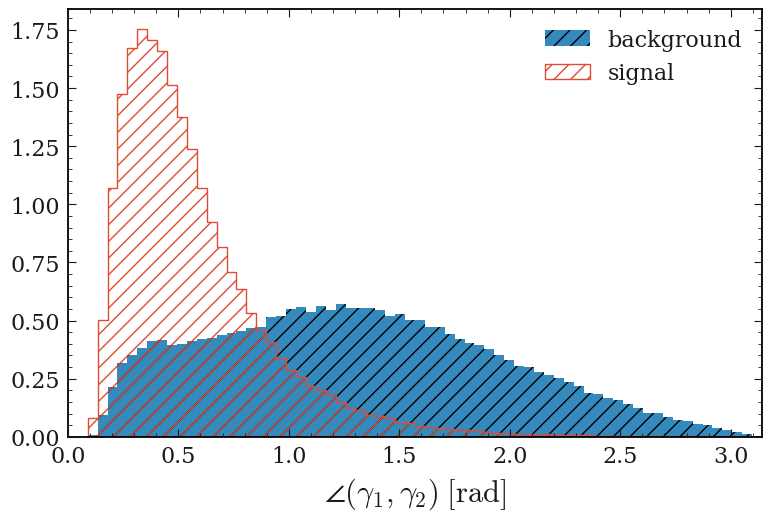

In [249]:
draw_bdt_var(bkg_data,sig_data,\
             var='eta_Pi0_daughterAngle_0_1', xrange = (0,math.pi,71),\
             xlabel = r'$\angle(\gamma_1,\gamma_2)\; [\mathrm{rad}]$',save_dir=save_dir)

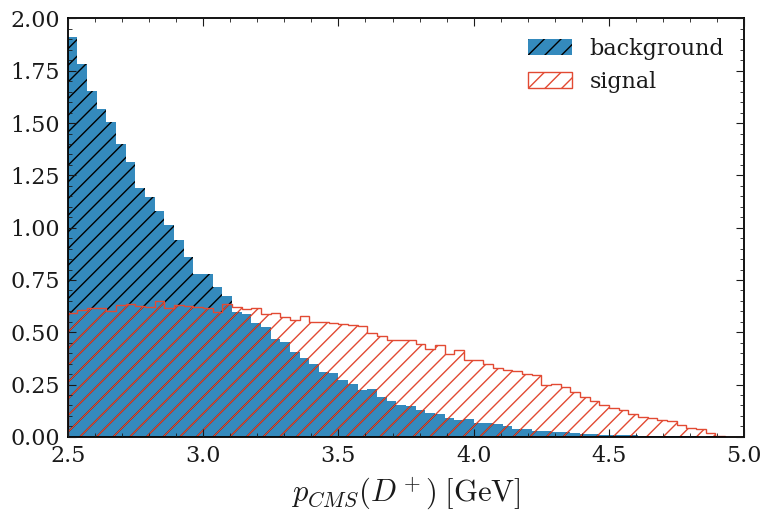

In [250]:


draw_bdt_var(bkg_data,sig_data,\
             var='Dp_CMS_p', xrange = (2.5,5,71),\
             xlabel = r'$p_{CMS}(D^+)\; [\mathrm{GeV}]$',save_dir=save_dir)

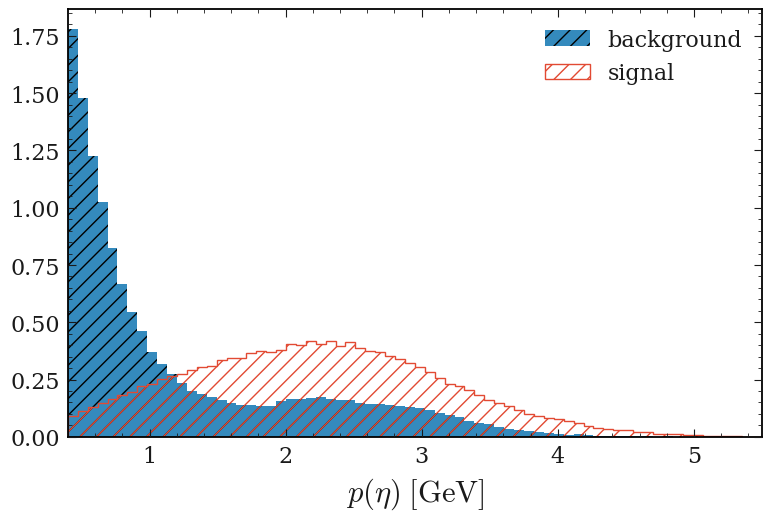

In [251]:
draw_bdt_var(bkg_data,sig_data,\
             var='etapip_Eta_p', xrange = (0.4,5.5,71),\
             xlabel = r'$p(\eta)\; [\mathrm{GeV}]$',save_dir=save_dir)